In [1]:
import pandas as pd

# Merge 12 months of sales data into a single file

In [2]:
#Merge 12 months of sales data into a single file
#read all the files in a data direcotry
from os import listdir
from os.path import isfile, join

#get the list of file names from data directory
file_names = [f_name for f_name in listdir('data')
              if isfile(join('data',f_name))]
#instanciate empty df where all months data will be concatenated
merged_df = pd.DataFrame()
for i in file_names:
    df = pd.read_csv('./data/'+i)
    merged_df = pd.concat([merged_df,df])
    

#drop all nulls columns
s_df=merged_df.loc[~merged_df['Order Date'].isnull()]
#drop duplicated titles
s_df= s_df.loc[s_df['Product'] != 'Product']

#save the result into a file
s_df.to_csv('sales_data.csv', index=False)

# Read merged df 

In [3]:
df = pd.read_csv('sales_data.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# What was the best month for sales? How much was earned that month?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
Order ID            185950 non-null int64
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [6]:
#Convert order date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
#Extract month from Order Date
df['Month'] = df['Order Date'].dt.month


In [8]:
#Calculate sale
df['Sale'] = df['Price Each']*df['Quantity Ordered']

In [9]:
#Group df by Month on the sum
df.groupby('Month').sum()['Sale']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sale, dtype: float64

In [10]:
#The greatest month is december and the the sale is about 4.6 million

In [11]:
import matplotlib.pyplot as plt

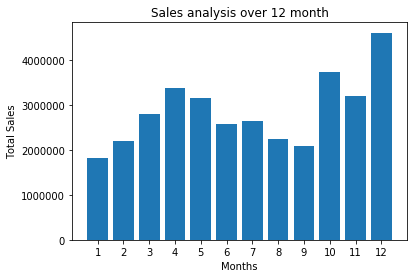

In [12]:
x = [i for i in range(1,13)]
y = df.groupby('Month').sum()['Sale']
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Sales analysis over 12 month')
plt.show()

# What city has the highest number of sales?

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
df['City'] = df['Purchase Address'].str.split(',').str[1]+' '+df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


In [15]:
df_city=df.groupby('City').sum()

In [16]:
df_city

,Order ID,Quantity Ordered,Price Each,Month,Sale
City,,,,,
Atlanta GA,3423838407,16602,2.779908e+06,104794,2.795499e+06
Austin TX,2280982185,11153,1.809874e+06,69829,1.819582e+06
Boston MA,4598265261,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,3415643578,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,6811084693,33289,5.421435e+06,208325,5.452571e+06
New York City NY,5736333884,27932,4.635371e+06,175741,4.664317e+06
Portland ME,563266345,2750,4.471893e+05,17144,4.497583e+05
Portland OR,2305594747,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,10304443952,50239,8.211462e+06,315520,8.262204e+06


In [17]:
x=df_city.index

In [18]:
y=df_city['Sale']

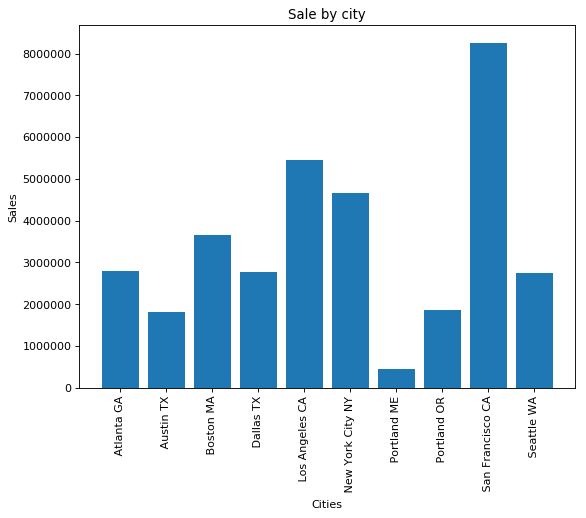

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Sale by city')

plt.show()

# What time should advertisement be done to increase the liklihood of customer buying product

In [20]:
#Group sales by hours
df['Hours'] = df['Order Date'].dt.hour

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [22]:
df_time = df.groupby('Hours').sum()

In [23]:
x = df_time.index

In [24]:
y= df_time['Sale']

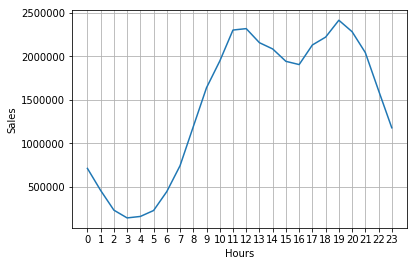

In [25]:
plt.plot(x,y)
plt.xticks(x)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.grid()

# What Products are most often sold together?

In [26]:
#keep the orders with more than one order in a single order
pst_df = df.loc[df['Order ID'].duplicated(keep=False)]

In [27]:
#group the product name in new column for each order ID
pst_df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Dilar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#remove the dupluacted order id
pst_df=pst_df[['Order ID','grouped']].drop_duplicates()

In [29]:
pst_df

,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [30]:
#all that is remaining now is to count the pairs 
#and see which group has maximum occurence
#can use combinations from itertools and Counter from collections for this 
from itertools import combinations
from collections import Counter

count= Counter()
for row in pst_df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [31]:
n=pst_df.groupby('grouped').count()
n['total items'] = (n.index.str.split(',').str.len())

In [32]:

#by using group by #for only two items
two_df = n.loc[n['total items'] == 2]
two_df.sort_values(by="Order ID", ascending=False, inplace=True)
two_df[:10]


C:\Users\Dilar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,total items
grouped,,
"iPhone,Lightning Charging Cable",882,2
"Google Phone,USB-C Charging Cable",856,2
"iPhone,Wired Headphones",361,2
"Vareebadd Phone,USB-C Charging Cable",312,2
"Google Phone,Wired Headphones",303,2
"iPhone,Apple Airpods Headphones",286,2
"Google Phone,Bose SoundSport Headphones",161,2
"Vareebadd Phone,Wired Headphones",104,2
"Vareebadd Phone,Bose SoundSport Headphones",60,2


In [33]:
#for only three items
two_df = n.loc[n['total items'] == 3]
two_df.sort_values(by="Order ID", ascending=False, inplace=True)
two_df[:10]


C:\Users\Dilar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,total items
grouped,,
"Google Phone,USB-C Charging Cable,Wired Headphones",77,3
"iPhone,Lightning Charging Cable,Wired Headphones",56,3
"iPhone,Lightning Charging Cable,Apple Airpods Headphones",43,3
"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones",31,3
"Vareebadd Phone,USB-C Charging Cable,Wired Headphones",31,3
"iPhone,Apple Airpods Headphones,Wired Headphones",23,3
"Google Phone,Bose SoundSport Headphones,Wired Headphones",21,3
"Vareebadd Phone,USB-C Charging Cable,Bose SoundSport Headphones",14,3
"iPhone,Apple Airpods Headphones,AAA Batteries (4-pack)",3,3


# What Product sold the most? Why do you thik it sold the most


In [42]:
new_df=df.groupby('Product').agg({'Price Each': 'mean', 'Quantity Ordered': 'sum'}).sort_values(by='Quantity Ordered', ascending=False)

In [43]:
new_df

,Price Each,Quantity Ordered
Product,,
AAA Batteries (4-pack),2.99,31017
AA Batteries (4-pack),3.84,27635
USB-C Charging Cable,11.95,23975
Lightning Charging Cable,14.95,23217
Wired Headphones,11.99,20557
Apple Airpods Headphones,150.00,15661
Bose SoundSport Headphones,99.99,13457
27in FHD Monitor,149.99,7550
iPhone,700.00,6849


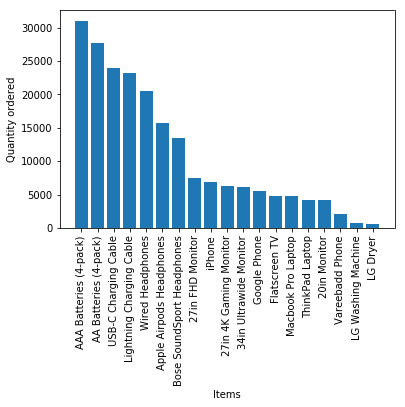

In [44]:
x= new_df.index
y= new_df['Quantity Ordered']
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity ordered')
plt.xlabel('Items')
plt.show()

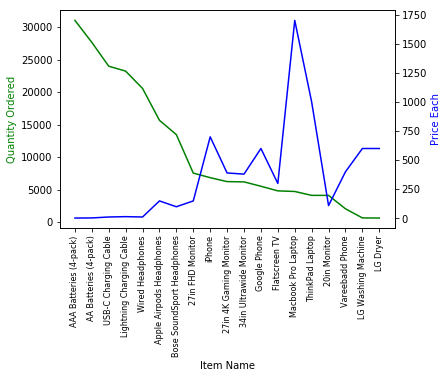

In [48]:
x = new_df.index
y1 = new_df['Quantity Ordered']
y2 = new_df['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Item Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticklabels(x, rotation='vertical', size=8)

plt.show()